<a href="https://colab.research.google.com/github/benafshapostwala/Data_Mining_CW/blob/main/Data_Mining_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing and mounting google drive as we have stored the data in a folder here (saved in email id benbakes21@gmail.com)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#importing the excel file containing the data using pandas
import pandas as pd
data = pd.ExcelFile('/content/gdrive/My Drive/Data_mining_cw2_data/LendingClubLoans2018-2020.xlsx')

In [4]:
#converting excel file to pandas dataframe
lending_data=pd.read_excel(data)

In [5]:
#inspecting the first 5 rows of the dataframe
lending_data.head()

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d,annual_inc,annual_inc_joint,verification_status,verification_status_joint,pymnt_plan,purpose,hardship_flag,hardship_reason,hardship_type,hardship_status,payment_plan_start_date,dti,dti_joint,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
0,113924213,Stagehand,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,2001-01-01,2017-08-01,2020-04-01,NaT,110000.0,NaN,Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,9.13,NaN,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,...,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,113101099,Detention Deputy,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,2000-12-01,2017-07-01,2019-06-01,NaT,54000.0,NaN,Not Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,20.67,NaN,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,...,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,113672609,NaN,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,1986-04-01,2017-07-01,2020-05-01,2020-06-01,74000.0,NaN,Verified,NaN,n,home_improvement,N,NaN,NaN,NaN,NaT,18.33,NaN,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,...,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,115053799,Driver,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,1990-02-01,2017-08-01,2019-10-01,NaT,58000.0,NaN,Source Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,29.05,NaN,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,...,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,6317122,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,1988-03-01,2013-08-01,2019-01-01,NaT,94020.0,NaN,Verified,NaN,n,debt_consolidation,N,NATURAL_DISASTER,INTEREST ONLY-3 MONTHS DEFERRAL,COMPLETED,2017-11-01,23.22,NaN,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,...,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,NaN,3.0,38.81,5283.25,42.29,116.43


In [6]:
#by describing the data, we can obtain a summary statistical report of all numerical variables
num_data=lending_data.describe()
Numerical_variables=num_data.columns
#now we can create a list of all numerical variables without listing them one by one
Numerical_variables=list(Numerical_variables)
Numerical_variables


['id',
 'loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'annual_inc_joint',
 'dti',
 'dti_joint',
 'delinq_2yrs',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low',
 'mort_acc',
 'open_acc',
 'open_acc_6m',
 'acc_open_past_24mths',
 'pub_rec',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'total_cu_tl',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_bal_il',
 'total_rev_hi_lim',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_rcnt_il',
 'mths_since_last_delinq',
 'mths_since_recent_revol_delinq',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'open_act_il',
 'open_

In [7]:
#Our target variable is 'loan_status' so we must take a look at how many classes we are dealing with
lending_data['loan_status'].unique()
#here we list out all the column names or variables in our data
all_variables=list(lending_data.columns)

In [8]:
import numpy as np
#to obtain a list of all categorical variables, we can comapare the all_variables list and Numerical_variables list
# to find the elements that are NOT listed in Numerical variables as they would have to be categorical in nature. 
#This is a short cut to avoid listing out by typing.
Categorical_variables = list(np.setdiff1d(all_variables,Numerical_variables))
Categorical_variables

['application_type',
 'earliest_cr_line',
 'emp_title',
 'grade',
 'hardship_flag',
 'hardship_reason',
 'hardship_status',
 'hardship_type',
 'home_ownership',
 'initial_list_status',
 'issue_d',
 'last_pymnt_d',
 'loan_status',
 'next_pymnt_d',
 'payment_plan_start_date',
 'purpose',
 'pymnt_plan',
 'term',
 'verification_status',
 'verification_status_joint']

In [9]:
nul_vals=lending_data.isnull().sum()
nul_vals=nul_vals.reset_index()
nul_vals

,index,0
0,id,0
1,emp_title,5862
2,application_type,0
3,home_ownership,0
4,loan_status,0
...,...,...
103,deferral_term,72668
104,hardship_amount,71042
105,hardship_payoff_balance_amount,71042
106,hardship_last_payment_amount,71042


In [18]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
lending_data["loan_status"] = ord_enc.fit_transform(lending_data[["loan_status"]])
lending_data[["loan_stat_code", "loan_status"]].head(50)
lending_data

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d,annual_inc,annual_inc_joint,verification_status,verification_status_joint,pymnt_plan,purpose,hardship_flag,hardship_reason,hardship_type,hardship_status,payment_plan_start_date,dti,dti_joint,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,...,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest,loan_stat_code
0,113924213,Stagehand,Individual,RENT,3.0,35000,0.1505,36 months,1214.15,C,2001-01-01,2017-08-01,2020-04-01,NaT,110000.0,NaN,Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,9.13,NaN,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,...,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,113101099,Detention Deputy,Individual,RENT,0.0,21000,0.1408,60 months,489.51,C,2000-12-01,2017-07-01,2019-06-01,NaT,54000.0,NaN,Not Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,20.67,NaN,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,...,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,113672609,NaN,Individual,MORTGAGE,1.0,20000,0.1408,60 months,466.20,C,1986-04-01,2017-07-01,2020-05-01,2020-06-01,74000.0,NaN,Verified,NaN,n,home_improvement,N,NaN,NaN,NaN,NaT,18.33,NaN,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,...,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,115053799,Driver,Individual,RENT,3.0,16000,0.1903,36 months,586.74,D,1990-02-01,2017-08-01,2019-10-01,NaT,58000.0,NaN,Source Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,29.05,NaN,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,...,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,6317122,JP Morgan Chase,Individual,MORTGAGE,3.0,24000,0.0890,60 months,497.04,A,1988-03-01,2013-08-01,2019-01-01,NaT,94020.0,NaN,Verified,NaN,n,debt_consolidation,N,NATURAL_DISASTER,INTEREST ONLY-3 MONTHS DEFERRAL,COMPLETED,2017-11-01,23.22,NaN,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,...,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,NaN,3.0,38.81,5283.25,42.29,116.43,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,119243234,IT analyst,Individual,MORTGAGE,1.0,3500,0.1505,36 months,121.42,C,1995-03-01,2017-09-01,2020-05-01,2020-06-01,109000.0,NaN,Verified,NaN,n,other,N,NaN,NaN,NaN,NaT,32.49,NaN,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,...,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
77155,120037535,Principal IA Engineer,Individual,MORTGAGE,1.0,2000,0.0797,36 months,62.65,A,2002-12-01,2017-09-01,2020-05-01,2020

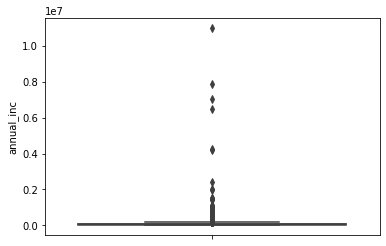

In [12]:
import seaborn as sns
sns.boxplot(y=lending_data['annual_inc'])